# bert-based-uncased

[See the model card for more information on the huggingface hub](https://huggingface.co/bert-base-uncased)

[Google's release on github and associated bert models](https://github.com/google-research/bert/blob/master/README.md) 

In [16]:
%%capture
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [17]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

model = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Masked Language Modeling

Here you can play with one of the "dummy tasks" BERT learned from. Let's pretend to be BERT learning a language and try to guess the masked word in the following sentence.

In [18]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
# help(pipeline)

In [23]:
%%capture  # comment out this line to see the results of the model
text = "She craved [MASK] to quench her thirst."
unmasker(text)

UsageError: unrecognized arguments: comment out this line to see the results of the model


In [21]:
%%capture # comment out this line to see the results of the model
text = "The best thing about [MASK] is they mostly clean up after themselves!"
unmasker(text)

UsageError: unrecognized arguments: comment out this line to see the results of the model


Ok, those are very interesting guesses...

# What data was this model trained on? 

After some meandering on the hugging face hub, we discovered this paper, which does a deep dive investigation into one of the data sources that BERT was trained on. 

[Addressing Documentation Debt" in Machine Learning Research: A Retrospective Datasheet for BookCorpus](https://arxiv.org/pdf/2105.05241.pdf)  

And turns out, Vampire books account for 5.4% of the BookCorpus dataset 🧛🏻‍♀️

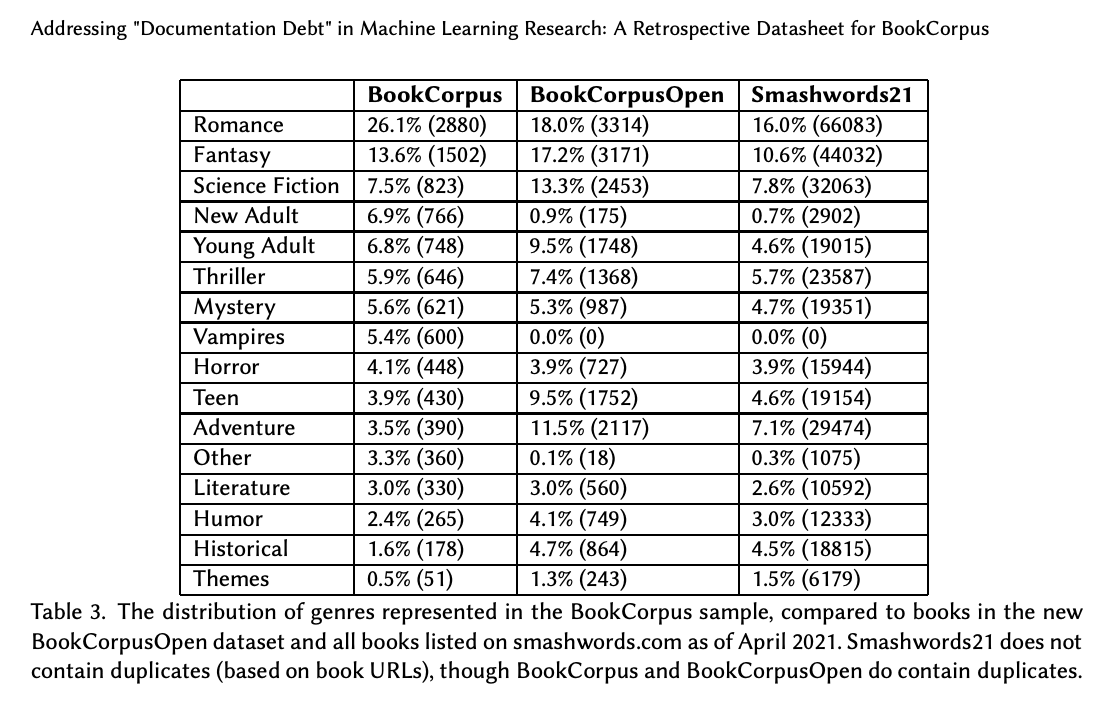

## Optional Exercise:

Create new masked sentences and see if you can derive any other interesting insights into how this model "models" language. Let us know if you discover any surprising results!

Suggestions:
- Try some sentences with references to your culture, holidays, food, etc.
- Try some sentences about historical events or people
- Try some sentences about scientific discoveries or any field of interest to you
- Try making up a joke, a song lyric or a short poem

In [24]:
# YOUR CODE HERE
# Create a prompt text with some words masked out, see what the model predicts
text = "Give the model a [MASK] to predict."
unmasker(text)

[{'score': 0.19289492070674896,
  'token': 2126,
  'token_str': 'way',
  'sequence': 'give the model a way to predict.'},
 {'score': 0.051731377840042114,
  'token': 2051,
  'token_str': 'time',
  'sequence': 'give the model a time to predict.'},
 {'score': 0.051390860229730606,
  'token': 2193,
  'token_str': 'number',
  'sequence': 'give the model a number to predict.'},
 {'score': 0.03003263846039772,
  'token': 3382,
  'token_str': 'chance',
  'sequence': 'give the model a chance to predict.'},
 {'score': 0.02129087597131729,
  'token': 7774,
  'token_str': 'curve',
  'sequence': 'give the model a curve to predict.'}]